In [1]:
from ultralytics import YOLO

# Path to your trained model (best.pt or last.pt)
model_path = "/Users/ramalakshmi/Documents/xray_classification/runs/segment/yolo_seg_kneexray-13_08-r1/weights/best.pt"
model = YOLO(model_path)

In [2]:
import glob
import os

val_images_path = "/Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/images"
val_label_path = "/Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/labels"

# List of images
val_images = sorted(glob.glob(os.path.join(val_images_path, "*.jpg")) +
                    glob.glob(os.path.join(val_images_path, "*.jpeg")) +
                    glob.glob(os.path.join(val_images_path, "*.png")))
len(val_images)


38


image 1/1 /Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/images/N15.jpg: 640x544 3 regions, 138.8ms
Speed: 4.9ms preprocess, 138.8ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 544)


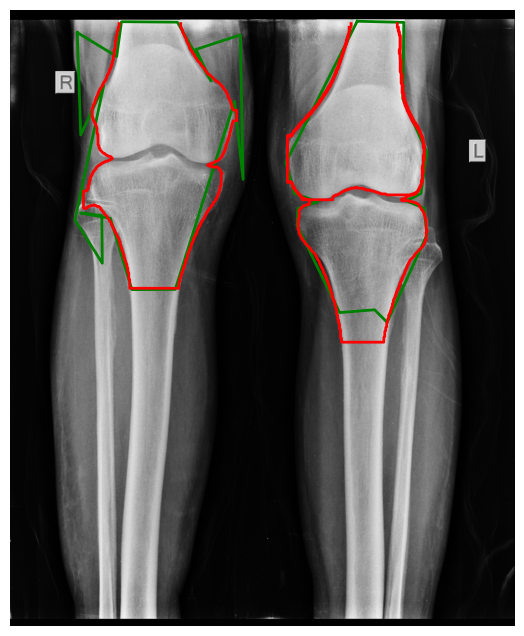


image 1/1 /Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/images/N24.jpg: 544x640 1 region, 106.2ms
Speed: 1.9ms preprocess, 106.2ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)


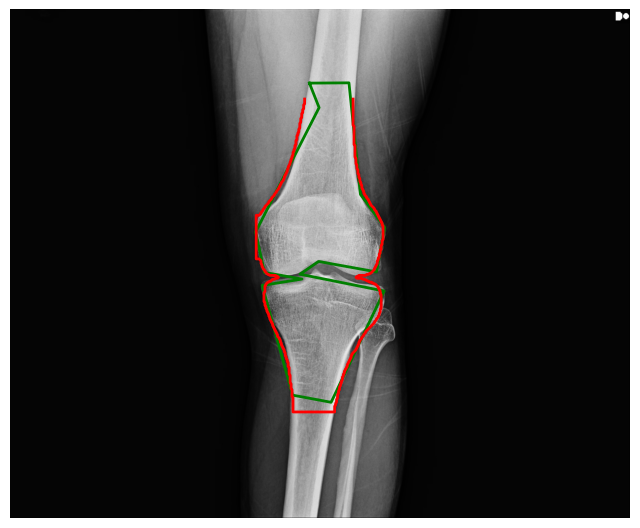


image 1/1 /Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/images/N25.jpg: 544x640 1 region, 97.6ms
Speed: 2.4ms preprocess, 97.6ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)


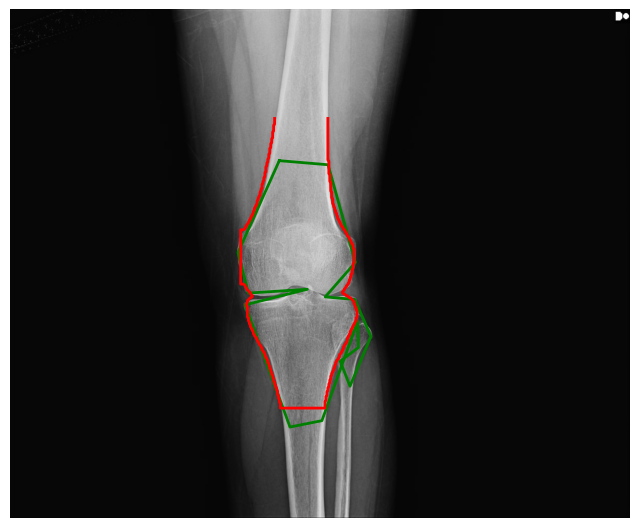

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

def plot_gt_and_pred(image_path, label_path):
    # Load image
    img = Image.open(image_path).convert("RGB")
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    
    # ------------------------
    # Plot Ground Truth (GT)
    # ------------------------
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                parts = list(map(float, line.strip().split()))
                cls_id, coords = int(parts[0]), parts[1:]
                if len(coords) % 2 == 0:
                    xs = [x * img.width for x in coords[::2]]
                    ys = [y * img.height for y in coords[1::2]]
                    plt.plot(xs + [xs[0]], ys + [ys[0]], 'g-', linewidth=2, label="GT")  # green
    
    # ------------------------
    # Plot Prediction
    # ------------------------
    results = model(image_path)
    pred = results[0]
    
    # Each predicted mask polygon
    for mask in pred.masks.xy:  # list of polygons, each Nx2
        xs = mask[:, 0]
        ys = mask[:, 1]
        plt.plot(xs, ys, 'r-', linewidth=2, label="Pred")  # red
    
    plt.axis("off")
    plt.show()

val_images_path = "/Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/images"
val_labels_path = "/Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/labels"

# Plot first 3 images
for img_file in sorted(os.listdir(val_images_path))[:3]:
    img_path = os.path.join(val_images_path, img_file)
    label_path = os.path.join(val_labels_path, os.path.splitext(img_file)[0] + ".txt")
    plot_gt_and_pred(img_path, label_path)


In [5]:
metrics = model.val(data="/Users/ramalakshmi/Documents/xray_classification/datasets.yaml")
print(metrics)

Ultralytics 8.3.199 🚀 Python-3.13.1 torch-2.8.0 CPU (Apple M1 Pro)
val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 968.0±342.2 MB/s, size: 579.1 KB)
val: Scanning /Users/ramalakshmi/Documents/xray_classification/yolo_seg/val/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 169.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.2it/s 19.1s9.7ss
                   all         49         77       0.66      0.882      0.771      0.498      0.678      0.904      0.806      0.537
Speed: 2.1ms preprocess, 368.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /Users/ramalakshmi/Documents/xray_classification/runs/segment/val
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object